found runid 72 with Cs 1835.6147326586315


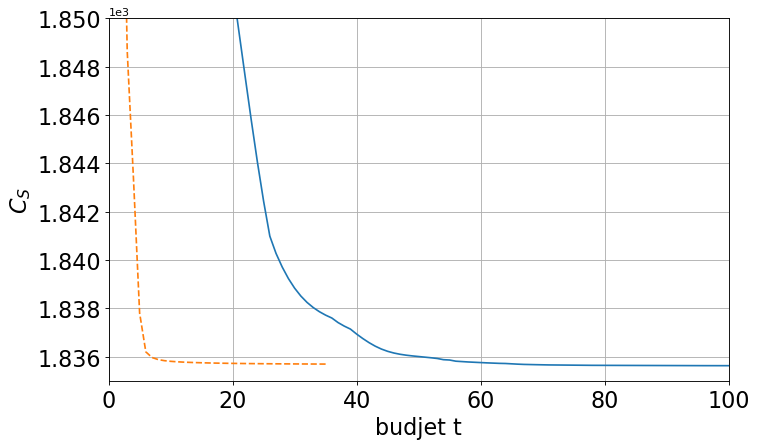

In [5]:
# compare speed cvg of TL-NMF and JD+NMF, with budget
# run_table2b.sh

import sys
import numpy as np
import matplotlib.pyplot as plt
from utils import load_obj, get_values
import matplotlib as mpl
#mpl.use('Agg')
#plt.style.use(['science','ieee'])
fs = 20 # fontsize

num_pertl = 1
num_pernmf = 10
s = 100
outname = 'GCM_complexity_S' + str(s)
rseed = 100

# find out the runid with the smallest Cs by TL-NMF
P=100 # nbruns
runid = 0
Cs = 0
for rid in range(P):
    tlnmf_infos = load_obj('../jdresults/ex17e_Ttl' + str(num_pertl) + '_Tnmf' + str(num_pernmf) +\
                           '/ex17e_tlnmf2_finite_S' + str(s) + '_rseed' + str(rseed) +\
                           '_runid' + str(rid)) #  + '_nmf' + str(nmf_pertl))
    CS_tl = np.array( get_values(tlnmf_infos['gs_obj_dict'],'Cs') )
    minCS = np.min(CS_tl)
    if runid == 0 or Cs > minCS:
        Cs = minCS
        runid = rid

print('found runid',runid,'with Cs',Cs)
# compare the Cs as budget for runid
if 1:   
    plt.figure(figsize=(10,6),dpi=80)
    
    # TL-NMF
    tlnmf_infos = load_obj('../jdresults/ex17e_Ttl' + str(num_pertl) + '_Tnmf' + str(num_pernmf) +\
                           '/ex17e_tlnmf2_finite_S' + str(s) + '_rseed' + str(rseed) +\
                           '_runid' + str(runid)) #  + '_nmf' + str(nmf_pertl))
    #print(tlnmf_infos)
    
    jd_infos = load_obj('../jdresults/ex17e_jdnmfb_finite' +\
                           '/' + 'ratio' + str(num_pernmf) + '_S' + str(s) + '_rseed' + str(rseed) +\
                           '_runid' + str(runid))
    
    # DO NOT convert iterations to W,H
    ite_tl = np.array( tlnmf_infos['gs_obj_iter'] ) / num_pertl  # * num_pernmf
    CS_tl = np.array( get_values(tlnmf_infos['gs_obj_dict'],'Cs') ) 
    ite_jd = np.array( jd_infos['gs_obj_iter'] ) / num_pertl  # * num_pernmf
    CS_jd = np.array( get_values(jd_infos['gs_obj_dict'],'Cs') )
    minval = min(np.min(CS_jd),np.min(CS_tl))
    
    # store in two tables
    with open(outname + '_tlnmf.dat', 'w') as the_file:
        the_file.write('t\tCs\n')
        for ite in range(len(ite_tl)):
            the_file.write('%d\t%g\n' % (ite_tl[ite],CS_tl[ite]))

    with open(outname + '_jdnmf.dat', 'w') as the_file:
        the_file.write('t\tCs\n')                      
        for ite in range(len(ite_jd)):
            the_file.write('%d\t%g\n' % (ite_jd[ite],CS_jd[ite]))
            
    plt.plot(ite_tl,CS_tl,'-')
    plt.plot(ite_jd,CS_jd,'--')

    plt.xlabel('budjet t',fontsize=fs)
    plt.ylabel('$C_S$',fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
    plt.grid('on')
    if s==100:
        plt.xlim([0,100])
        plt.ylim([int(minval),1850])
    elif s==10:
        plt.xlim([0,200])
        plt.ylim([int(minval),1850])

    if 0:
        i_tl = np.min(np.where( CS_tl < eps ))
        T_eps_tl = ite_tl[i_tl]
        print('tl:T_eps',T_eps_tl)
        i_jd = np.min(np.where( CS_jd < eps ))
        T_eps_jd = ite_jd[i_jd]
        print('jd:T_eps',T_eps_jd)

#plt.savefig('./jdresults/ex17e_tlnmfb_Cs3/analyse_ratio' + str(num_pernmf) + '_S' + str(s) +\
#            '_rseed' + str(rseed) + '_runid' + str(runid))
            
plt.show()
